<h1 style = "font-size:3rem;color:orange">Frequency Response</h1>

In [15]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd 

import librosa                    
import librosa.display

import scipy as sp

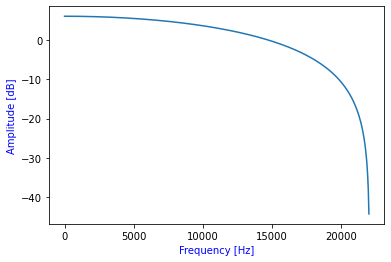

In [141]:
sr = 44100


b = [1, 1]
a = [1]

w, h = sp.signal.freqz(b,a)

plt.plot(w * sr / (2* np.pi), 20 * np.log10(abs(h)))
plt.xlabel('Frequency [Hz]', color='b')
plt.ylabel('Amplitude [dB]', color='b')
plt.show()


<h1 style = "font-size:3rem;color:orange">Butterworth Filters</h1>

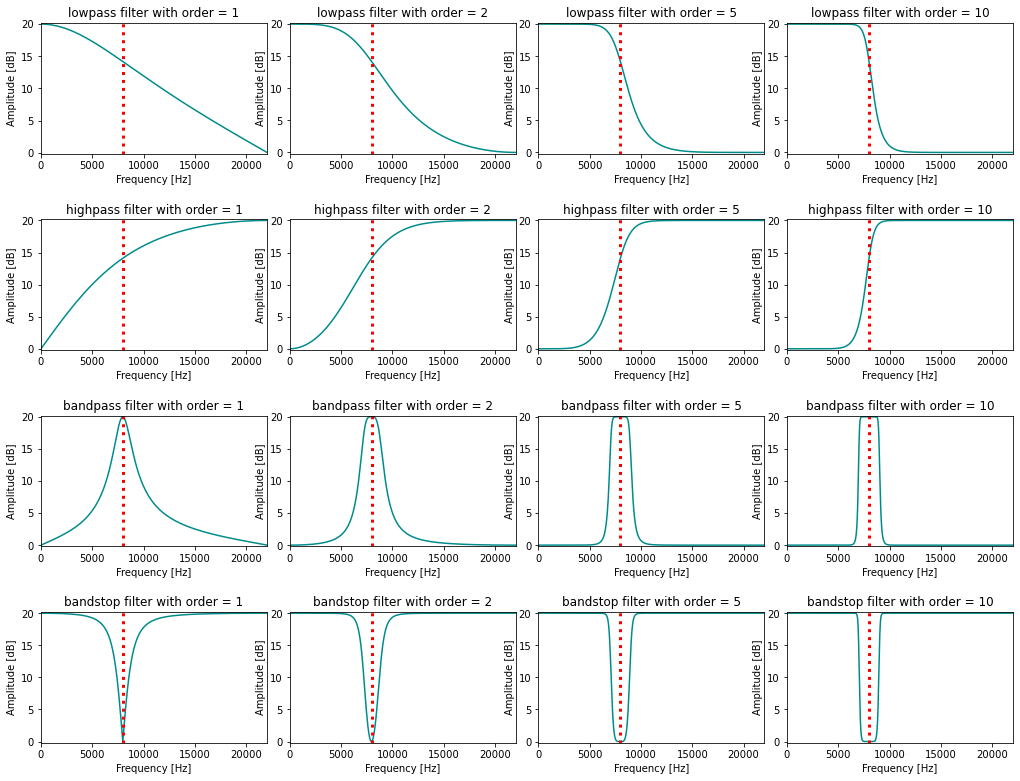

In [225]:
c = 8000 # critical freq
bw = 1000 # bandwidth for bandwidth and stop
filter_orders = [1, 2, 5, 10]
filter_types = ['lowpass', 'highpass', 'bandpass', 'bandstop']
idx = 1

plt.figure(figsize=(15, 5))

for l in range(0, len(filter_types)):
    for i in range(0,len(filter_orders)):
        
        plt.subplot(4,4,idx)
        
        if str(filter_types[l]) == 'bandpass' or str(filter_types[l]) == 'bandstop':
            fc = [c-bw, c+bw]
        else:
            fc = c
        
        b, a = sp.signal.butter(filter_orders[i], fc, btype=str(filter_types[l]),fs = sr)
        w, h = sp.signal.freqz(b, a, fs=sr)
        
        #print(f'Filter order = {np.maximum(len(a), len(b)) -1}')
        #print(f'Feedforward coefficient (b) are {b}')
        #print(f'Feedback coefficient (a) are {a}')

        plt.plot(w, 20 * abs(h), color='darkcyan')

        plt.title(f'{str(filter_types[l])} filter with order = {filter_orders[i]}')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude [dB]')
        plt.margins(0, 0.01)
        plt.grid(which='minor', axis='both')
        plt.axvline(c, color='red', lw = '3', ls = 'dotted') # cutoff frequency
        idx+=1

plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=1, 
                    top=2, 
                    wspace=0.1, 
                    hspace=0.5)
plt.show()

In [121]:
print(np.shape(w))

(200,)
